<a href="https://www.kaggle.com/code/morpho23/infiltration-detection-for-cybersecurity?scriptVersionId=231383151" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cybersecurity-intrusion-detection-dataset/cybersecurity_intrusion_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/cybersecurity-intrusion-detection-dataset/cybersecurity_intrusion_data.csv")

In [3]:
df2 = df.copy()

In [4]:
df2.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [5]:
df2.sample()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
7090,SID_07091,404,TCP,5,1005.703086,NaN,0.205689,3,Chrome,1,1


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [7]:
df2.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [8]:
# Check for missing values in each column
missing_values = df2.isnull().sum()
print(missing_values)


session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64


In [9]:
# List all column names
print(df2.columns)


Index(['session_id', 'network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access',
       'attack_detected'],
      dtype='object')


In [10]:
df2['encryption_used'] = df2['encryption_used'].fillna('None')


In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encoding categorical features
df2['protocol_type'] = label_encoder.fit_transform(df2['protocol_type'])
df2['encryption_used'] = label_encoder.fit_transform(df2['encryption_used'])
df2['browser_type'] = label_encoder.fit_transform(df2['browser_type'])
df2['unusual_time_access'] = label_encoder.fit_transform(df2['unusual_time_access'])


In [12]:
from sklearn.preprocessing import StandardScaler

# List of numerical features
numerical_features = ['network_packet_size', 'session_duration', 'ip_reputation_score']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numerical features
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])


In [13]:
# List all column names to check for 'id'
print(df2.columns)


Index(['session_id', 'network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access',
       'attack_detected'],
      dtype='object')


In [14]:
# Drop 'session_id' and 'attack_detected' columns
X = df2.drop(['attack_detected', 'session_id'], axis=1)

# Extract the target variable
y = df2['attack_detected']


In [15]:
# Separate features and target variable
X = df2.drop(['attack_detected', 'session_id'], axis=1)  # Dropping session_id as it's not useful for modeling
y = df2['attack_detected']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Print classification report to evaluate the model
print(classification_report(y_test, y_pred))

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1042
           1       1.00      0.78      0.87       866

    accuracy                           0.90      1908
   macro avg       0.92      0.89      0.89      1908
weighted avg       0.91      0.90      0.89      1908

Accuracy: 0.8968


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

# Function to train multiple models
def train_models(X_train, y_train):
    # Initialize models
    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "XGBoost": xgb.XGBClassifier(random_state=42)
    }
    
    # Fit models on the training data
    trained_models = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[name] = model
    
    return trained_models

# Function to print classification reports for all models
def print_classification_reports(trained_models, X_test, y_test):
    for model_name, model in trained_models.items():
        y_pred = model.predict(X_test)
        print(f"Classification Report for {model_name}:\n")
        print(classification_report(y_test, y_pred))
        print("="*60)


In [18]:
trained_models = train_models(X_train, y_train)


In [19]:
print_classification_reports(trained_models, X_test, y_test)


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.74      0.81      0.78      1042
           1       0.75      0.66      0.70       866

    accuracy                           0.75      1908
   macro avg       0.75      0.74      0.74      1908
weighted avg       0.75      0.75      0.74      1908

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1042
           1       0.84      0.76      0.80       866

    accuracy                           0.82      1908
   macro avg       0.83      0.82      0.82      1908
weighted avg       0.83      0.82      0.82      1908

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1042
           1       0.80      0.82      0.81       866

    accuracy                           0.82      190

For Intrusion Detection Systems, the most important metrics I prioritize are:

1. Recall: I don't want to miss detecting a potential attack (false negatives), so recall is crucial.
2. Precision: I want to avoid labeling normal traffic as an attack (false positives), so precision is also important.
3. F1-Score: Since recall and precision are both important, F1-score balances them well, making it a good choice for overall performance.
4. ROC-AUC: It's useful for evaluating how well the model distinguishes between normal traffic and attacks, but I consider it less important than recall in this case.

In short:
- Primary: Recall (to minimize false negatives)
- Secondary: Precision (to minimize false positives)
- Balanced evaluation: F1-Score (for both precision and recall balance)

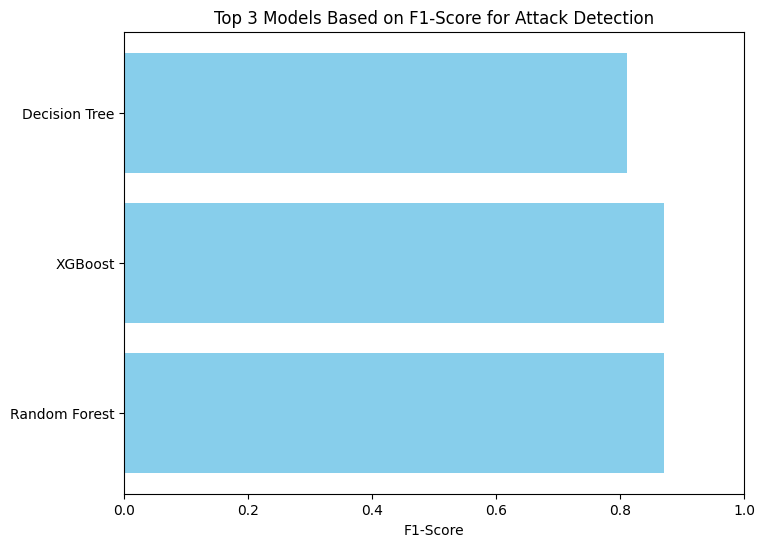

In [20]:
import matplotlib.pyplot as plt

# Dictionary containing F1-scores for class 1 (attack detection) for each model
f1_scores = {
    "Logistic Regression": 0.70,
    "Naive Bayes": 0.80,
    "Decision Tree": 0.81,
    "Random Forest": 0.87,
    "XGBoost": 0.87
}

# Select the top 3 models based on F1-score for attack detection (class 1)
top_3_models = sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)[:3]

# Prepare data for plotting
model_names = [model[0] for model in top_3_models]
model_scores = [model[1] for model in top_3_models]

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.barh(model_names, model_scores, color='skyblue')
plt.xlabel('F1-Score')
plt.title('Top 3 Models Based on F1-Score for Attack Detection')
plt.xlim(0, 1)  # F1-score ranges from 0 to 1
plt.show()


Comparing the relevant metrics (F1-score, recall, and precision) for **XGBoost** and **Random Forest** from the outputs:

### XGBoost:
- Precision (Attack = 1): 0.97
- Recall (Attack = 1): 0.78
- F1-Score (Attack = 1): 0.87
- Accuracy: 0.89

### Random Forest:
- Precision (Attack = 1): 1.00
- Recall (Attack = 1): 0.78
- F1-Score (Attack = 1): 0.87
- Accuracy: 0.90

### Comparison:
- Both models have exactly the same F1-score (0.87) for detecting attacks (class 1), which means they balance precision and recall in the same way.
- Random Forest has a higher precision for attacks (1.00), meaning it has fewer false positives compared to XGBoost, but it has the same recall (0.78) for attacks.
- XGBoost has a slightly lower precision (0.97), but Random Forest is a little better in terms of distinguishing between normal traffic and attacks.
- Both models have very similar accuracy (0.89 for XGBoost and 0.90 for Random Forest).

### Conclusion:
In this project:
- Both **XGBoost** and **Random Forest** perform very similarly with respect to detecting attacks, as they have the same F1-score.
- **Random Forest** has a slight edge in precision (false positives are less), while **XGBoost** has a slightly lower precision but still performs very well.
  
Thus, they perform almost equally in this specific case, and the choice between them may come down to slight nuances in performance or factors like computation time or ease of deployment.